# French women and men salaries comparing

Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing dataset

In [2]:
df = pd.read_csv('net_salary_per_town_categories.csv')

### Unique codes for the data set
```
CODGEO : unique code of the town
LIBGEO : name of the town
SNHM14 : mean net salary
SNHMC14 : mean net salary per hour for executive
SNHMP14 : mean net salary per hour for middle manager
SNHME14 : mean net salary per hour for employee
SNHMO14 : mean net salary per hour for worker
SNHMF14 : mean net salary for women
SNHMFC14 : mean net salary per hour for feminin executive
SNHMFP14 : mean net salary per hour for feminin middle manager
SNHMFE14 : mean net salary per hour for feminin employee
SNHMFO14 : mean net salary per hour for feminin worker
SNHMH14 : mean net salary for man
SNHMHC14 : mean net salary per hour for masculin executive
SNHMHP14 : mean net salary per hour for masculin middle manager
SNHMHE14 : mean net salary per hour for masculin employee
SNHMHO14 : mean net salary per hour for masculin worker
SNHM1814 : mean net salary per hour for 18-25 years old
SNHM2614 : mean net salary per hour for 26-50 years old
SNHM5014 : mean net salary per hour for >50 years old
SNHMF1814 : mean net salary per hour for women between 18-25 years old
SNHMF2614 : mean net salary per hour for women between 26-50 years old
SNHMF5014 : mean net salary per hour for women >50 years old
SNHMH1814 : mean net salary per hour for men between 18-25 years old
SNHMH2614 : mean net salary per hour for men between 26-50 years old
SNHMH5014 : mean net salary per hour for men >50 years old
```

In [3]:
df.head(10)

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9
5,01027,Balan,13.9,22.2,15.1,11.0,11.4,12.5,20.3,14.0,...,11.7,9.7,14.1,15.4,9.5,12.8,13.0,9.9,15.3,17.2
6,01031,Bellignat,12.4,24.0,13.1,10.5,10.4,10.9,20.7,11.8,...,10.8,9.3,12.5,13.3,8.9,11.0,11.5,9.6,13.3,14.9
7,01032,Béligneux,14.0,23.1,15.3,10.9,11.3,12.4,20.5,13.9,...,11.6,9.7,13.9,16.7,9.7,12.4,13.8,9.6,15.0,19.3
8,01033,Bellegarde-sur-Valserine,11.5,21.2,13.5,9.9,10.5,10.3,20.8,12.3,...,11.0,9.6,11.5,12.7,9.2,10.3,11.3,10.0,12.3,13.9
9,01034,Belley,12.4,23.4,14.1,10.3,10.5,11.0,21.5,13.0,...,10.9,9.7,12.3,13.7,9.3,11.2,11.4,9.9,13.0,15.4


### Understading how big data set is

In [4]:
df.index.size

5136

### Cleaning and renaming column fields

In [5]:
df_clear = df.copy()
# df_clear.drop('CODGEO',axis=1, inplace=True)
df_renamed = df_clear.rename(columns={"CODGEO":"Code","LIBGEO": "City", "SNHM14": "Mean", "SNHMC14": "Executive", "SNHMP14": "Middle Manager", "SNHME14":"Employee", "SNHMO14":"Worker", "SNHMF14":"Women", "SNHMFC14":"Fem. Executive", "SNHMFP14":"Fem. Middle Manager", "SNHMFE14":"Fem. Employee", "SNHMFO14":"Fem. Worker", "SNHMH14":"Man", "SNHMHC14":"Men Executive", "SNHMHP14":"Men Middle Manager", "SNHMHE14":"Men Employee", "SNHMHO14":"Men Worker", "SNHM1814":"18-25 year old", "SNHM2614":"26-50 year old", "SNHM5014":">50 year old", "SNHMF1814":"Fem. 18-25 year", "SNHMF2614":"Fem. 26-50 year", "SNHMF5014":"Fem. >50 year", "SNHMH1814":"Men 18-25 year", "SNHMH2614":"Men 26-50 year", "SNHMH5014":"Men >50 year"})
df_renamed.head(10)

	

,Code,City,Mean,Executive,Middle Manager,Employee,Worker,Women,Fem. Executive,Fem. Middle Manager,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9
5,01027,Balan,13.9,22.2,15.1,11.0,11.4,12.5,20.3,14.0,...,11.7,9.7,14.1,15.4,9.5,12.8,13.0,9.9,15.3,17.2
6,01031,Bellignat,12.4,24.0,13.1,10.5,10.4,10.9,20.7,11.8,...,10.8,9.3,12.5,13.3,8.9,11.0,11.5,9.6,13.3,14.9
7,01032,Béligneux,14.0,23.1,15.3,10.9,11.3,12.4,20.5,13.9,...,11.6,9.7,13.9,16.7,9.7,12.4,13.8,9.6,15.0,19.3
8,01033,Bellegarde-sur-Valserine,11.5,21.2,13.5,9.9,10.5,10.3,20.8,12.3,...,11.0,9.6,11.5,12.7,9.2,10.3,11.3,10.0,12.3,13.9
9,01034,Belley,12.4,23.4,14.1,10.3,10.5,11.0,21.5,13.0,...,10.9,9.7,12.3,13.7,9.3,11.2,11.4,9.9,13.0,15.4


### Checking is there missing values

In [6]:
df_renamed.isnull().sum()

Code                   0
City                   0
Mean                   0
Executive              0
Middle Manager         0
Employee               0
Worker                 0
Women                  0
Fem. Executive         0
Fem. Middle Manager    0
Fem. Employee          0
Fem. Worker            0
Man                    0
Men Executive          0
Men Middle Manager     0
Men Employee           0
Men Worker             0
18-25 year old         0
26-50 year old         0
>50 year old           0
Fem. 18-25 year        0
Fem. 26-50 year        0
Fem. >50 year          0
Men 18-25 year         0
Men 26-50 year         0
Men >50 year           0
dtype: int64

### Average of all cities. Let's define hourly mean in the country

In [7]:
hour_mean = df_renamed['Mean'].mean()
hour_mean

13.70638629283489

#### Spliting cities.

Cities who earn more than country's average 

In [8]:
higher_mean_cities = df_renamed[df_renamed['Mean']>=hour_mean]
higher_mean_cities.index.size

1831

Cities who earn less than country's average 

In [9]:
lower_mean_cities = df_renamed[df_renamed['Mean']<hour_mean]
lower_mean_cities.index.size

3305

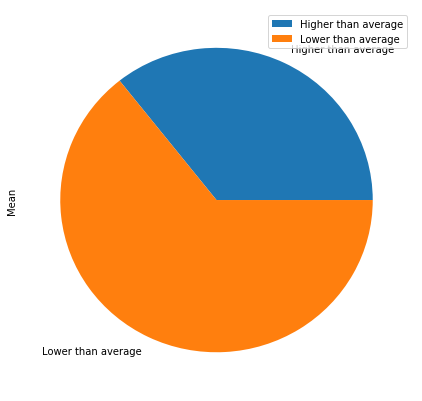

In [10]:
df_city_mean_distribution = pd.DataFrame({'Mean': [higher_mean_cities.index.size, lower_mean_cities.index.size]}, index = ['Higher than average', 'Lower than average'])
pie_plot = df_city_mean_distribution.plot.pie(y='Mean', figsize= [7,7])

In [11]:
higher_mean_cities['Mean'].mean()

16.10191152375751

In [12]:
lower_mean_cities['Mean'].mean()

12.379243570347956

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

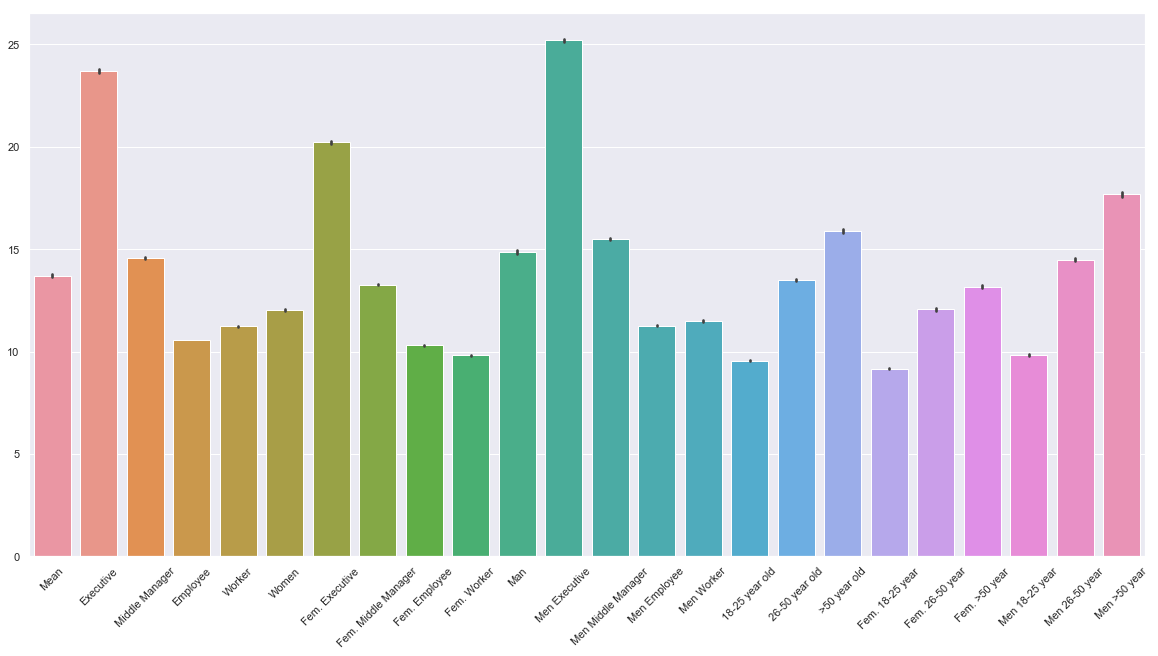

In [13]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=df_renamed)
plt.xticks(rotation=45)

### Distribution of average salary in country

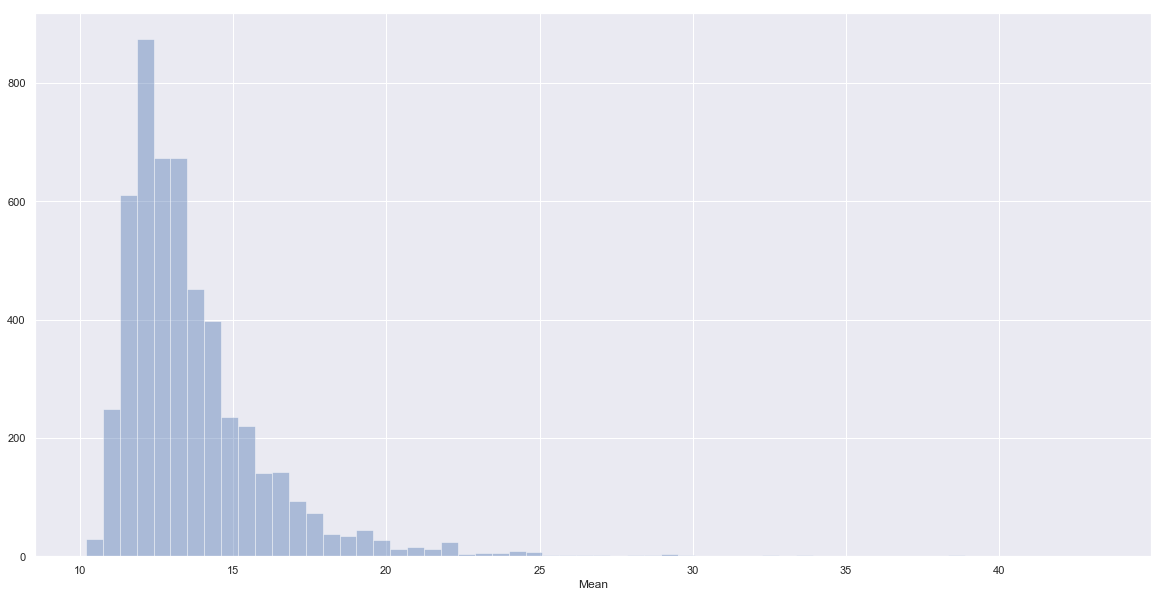

In [14]:
sns.distplot(df_renamed['Mean'],kde=False, bins = 60)

### Female between 26 and 50 year linear regression from average women salaries in cities that has higher and lower salaries averages

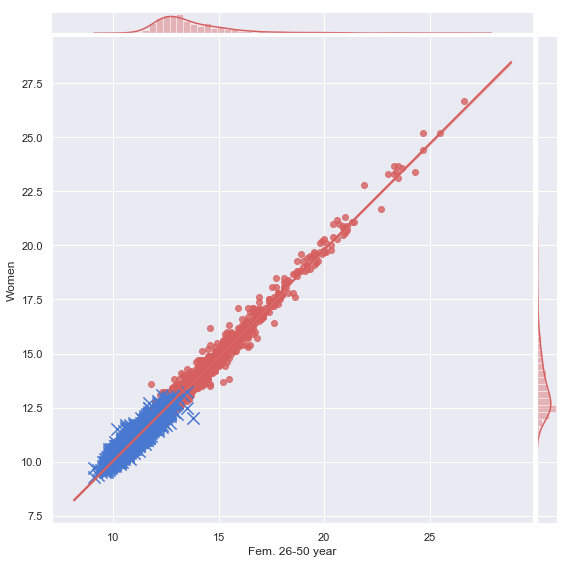

In [96]:
df_women_high = pd.DataFrame(data=higher_mean_cities, columns=['Fem. 26-50 year', 'Women'])
df_women_low = pd.DataFrame(data=lower_mean_cities, columns=['Fem. 26-50 year', 'Women'])
graph = sns.jointplot(x=df_women_high['Fem. 26-50 year'], y=df_women_high['Women'], color='r', kind='reg', height=8, ratio=20)
graph.x = df_women_low['Fem. 26-50 year']
graph.y = df_women_low['Women']
graph.plot_joint(plt.scatter, marker='x', c='b', s=150)


### Men between 26 and 50 year linear regression from average men salaries in cities that has higher and lower salaries averages

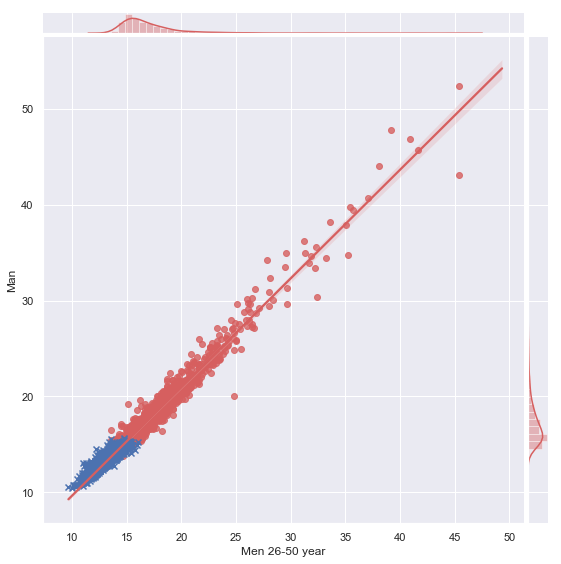

In [103]:
df_men_high = pd.DataFrame(data=higher_mean_cities, columns=['Men 26-50 year', 'Man'])
df_men_low = pd.DataFrame(data=lower_mean_cities, columns=['Men 26-50 year', 'Man'])
graph = sns.jointplot(x=df_men_high['Men 26-50 year'], y=df_men_high['Man'], color='r', kind='reg', height=8, ratio=20)
graph.x = df_men_low['Men 26-50 year']
graph.y = df_men_low['Man']
graph.plot_joint(plt.scatter, marker='x')

## Information on the number of firms in every french town, categorized by size

### Unique codes for the data set
```
CODGEO : geographique code for the town (can be joined with *code_insee* column from "name_geographic_information.csv')
LIBGEO : name of the town (in french)
REG : region number
DEP : depatment number
E14TST : total number of firms in the town
E14TS0ND : number of unknown or null size firms in the town
E14TS1 : number of firms with 1 to 5 employees in the town
E14TS6 : number of firms with 6 to 9 employees in the town
E14TS10 : number of firms with 10 to 19 employees in the town
E14TS20 : number of firms with 20 to 49 employees in the town
E14TS50 : number of firms with 50 to 99 employees in the town
E14TS100 : number of firms with 100 to 199 employees in the town
E14TS200 : number of firms with 200 to 499 employees in the town
E14TS500 : number of firms with more than 500 employees in the town
```

In [17]:
df_industry = pd.read_csv('base_etablissement_par_tranche_effectif.csv')

In [18]:
df_industry_cleaned = df_industry.copy()
df_industry_cleaned.drop(['REG', 'DEP'],axis=1, inplace=True)
df_industry_cleaned_renamed = df_industry_cleaned.rename(columns={"LIBGEO":"Town","CODGEO":"Code","E14TST": "Total firms", "E14TS0ND": "Unknown or null", "E14TS1":"1 to 5 employees", "E14TS6":"6 to 9 employees", "E14TS10":"10 to 19 employees", "E14TS20":"20 to 49 employees", "E14TS50":"50 to 99 employees", "E14TS100":"100 to 199 employees", "E14TS200":"200 to 499 employees", "E14TS500":">500 employees"})

In [30]:
full_data = df_industry_cleaned_renamed.merge(df_renamed, how="left", left_on = "Code", right_on="Code")

In [31]:
full_data.head()

,Code,Town,Total firms,Unknown or null,1 to 5 employees,6 to 9 employees,10 to 19 employees,20 to 49 employees,50 to 99 employees,100 to 199 employees,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
0,01001,L'Abergement-Clémenciat,25,22,1,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01002,L'Abergement-de-Varey,10,9,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01004,Ambérieu-en-Bugey,996,577,272,63,46,24,9,3,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
3,01005,Ambérieux-en-Dombes,99,73,20,3,1,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01006,Ambléon,4,4,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Top 10 cities with highest average salaries

In [21]:
top10_cities = full_data[full_data['Mean']>=hour_mean].sort_values(by='Mean', ascending=False).head(10)
top10_cities

,Code,Town,Total firms,Unknown or null,1 to 5 employees,6 to 9 employees,10 to 19 employees,20 to 49 employees,50 to 99 employees,100 to 199 employees,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
4225,78571,Saint-Nom-la-Bretèche,448,339,75,22,10,2,0,0,...,35.3,11.4,38.1,56.9,11.4,24.7,25.9,11.4,45.4,68.6
4170,78233,Feucherolles,223,169,43,4,3,4,0,0,...,26.4,10.0,32.3,54.0,10.2,21.9,27.1,9.8,39.2,65.8
4173,78251,Fourqueux,268,221,39,4,1,2,1,0,...,53.2,11.5,34.2,49.6,9.7,23.4,26.2,12.6,40.9,59.9
4872,92051,Neuilly-sur-Seine,10486,7890,1729,283,259,195,62,31,...,23.5,12.6,34.4,47.6,12.0,26.6,31.0,13.2,41.6,61.3
4237,78650,Le Vésinet,1481,1159,251,38,18,9,3,3,...,23.8,11.3,32.3,50.5,10.9,24.7,30.3,11.6,38.1,62.1
4194,78367,Mareil-Marly,262,209,38,8,4,1,2,0,...,27.4,11.0,31.7,42.3,10.9,23.3,26.4,11.0,37.1,49.8
4156,78133,Chambourcy,535,324,122,46,20,16,2,2,...,19.8,10.5,35.0,35.6,10.8,19.8,22.1,10.3,45.4,43.6
4169,78224,L'Étang-la-Ville,243,208,31,1,2,1,0,0,...,23.8,11.5,30.6,41.6,11.4,23.7,25.8,11.6,35.4,49.2
4881,92076,Vaucresson,666,526,106,17,8,2,4,3,...,20.1,10.9,30.1,42.2,10.5,25.5,27.0,11.2,33.6,51.7
4164,78190,Croissy-sur-Seine,809,591,140,32,25,11,7,1,...,20.8,11.0,30.3,41.1,10.4,23.5,24.7,11.5,35.7,50.5


### Bottom 10 cities with lowest average salaries

In [22]:
bottom10_cities = full_data[full_data['Mean']<hour_mean].sort_values(by='Mean', ascending=True).head(10)
bottom10_cities

,Code,Town,Total firms,Unknown or null,1 to 5 employees,6 to 9 employees,10 to 19 employees,20 to 49 employees,50 to 99 employees,100 to 199 employees,...,Men Worker,18-25 year old,26-50 year old,>50 year old,Fem. 18-25 year,Fem. 26-50 year,Fem. >50 year,Men 18-25 year,Men 26-50 year,Men >50 year
1184,31042,Bagnères-de-Luchon,474,297,147,20,6,4,0,0,...,9.1,9.0,9.9,11.8,9.1,9.6,10.1,8.8,10.2,13.7
2237,47168,Miramont-de-Guyenne,245,145,69,20,6,4,0,1,...,9.7,8.1,10.2,11.4,7.8,9.7,9.9,8.4,10.4,12.5
604,17397,Saint-Savinien,159,110,40,6,1,2,0,0,...,8.9,8.7,9.8,12.2,8.6,9.6,12.0,8.7,10.0,12.3
763,23008,Aubusson,382,223,122,15,6,12,2,1,...,9.1,8.5,9.8,11.7,8.4,9.3,10.5,8.5,10.1,12.7
4314,81033,Blaye-les-Mines,144,94,34,2,5,4,3,1,...,9.4,8.5,10.1,11.9,8.5,9.6,10.0,8.5,10.4,13.7
5135,97424,Cilaos,244,179,47,10,5,2,1,0,...,10.3,8.9,10.2,12.6,9.0,9.5,11.8,8.9,10.4,12.9
5132,97421,Salazie,285,232,41,7,2,2,1,0,...,10.0,9.0,10.6,11.4,8.9,9.9,10.5,9.0,11.0,11.7
1137,30132,La Grand-Combe,261,202,44,6,4,3,1,1,...,10.2,9.0,10.1,11.5,8.5,9.1,11.3,9.5,10.6,11.7
230,07201,Ruoms,293,184,81,14,9,3,2,0,...,9.3,8.0,10.4,11.8,7.8,9.8,10.5,8.1,10.9,13.2
1176,30350,Le Vigan,368,262,77,16,6,4,2,1,...,8.9,8.0,9.7,12.4,8.2,9.9,11.2,7.9,9.6,13.5


## Average salaries comparisons

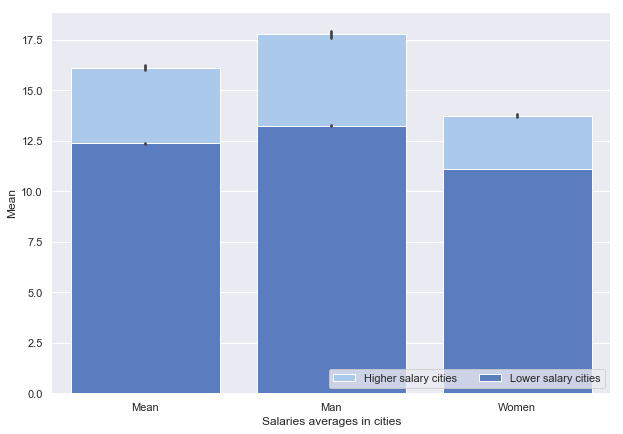

In [32]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 7))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(data=higher_mean_cities[['Mean','Man', 'Women']],
            label="Higher salary cities", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(data=lower_mean_cities[['Mean','Man', 'Women']],
            label="Lower salary cities", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Mean",
       xlabel="Salaries averages in cities")
sns.despine(left=True, bottom=True)

Graphic shows that women who works in wealthier cities barely earns more than man who works in lower average salary cities.
Also the gap between women are less than men.

In [24]:
low = lower_mean_cities[['City', 'Mean','Fem. 18-25 year','Fem. 26-50 year', 'Fem. >50 year', 'Men 18-25 year','Men 26-50 year', 'Men >50 year']].sort_values(by='Mean')

In [25]:
top = higher_mean_cities[['City', 'Mean','Fem. 18-25 year','Fem. 26-50 year', 'Fem. >50 year', 'Men 18-25 year','Men 26-50 year', 'Men >50 year']].sort_values(by='Mean', ascending=False)


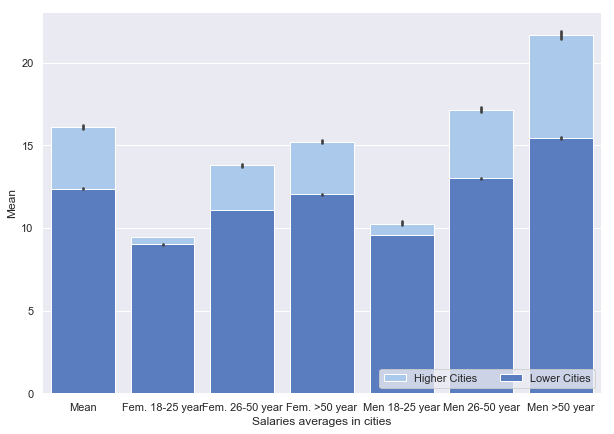

In [95]:
f, ax = plt.subplots(figsize=(10, 7))

sns.set_color_codes("pastel")
sns.barplot(data=top,
            label="Higher Cities", color="b")

sns.set_color_codes("muted")
sns.barplot(data=low,
            label="Lower Cities", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Mean",
       xlabel="Salaries averages in cities")
sns.despine(left=True, bottom=True)

<ul>
    <li>
        In less and higher earning cities both men and women starts basicaly with the same average salary
    </li>
    <li>
        In less and higher earning cities women does not reach mean salaries.
    </li>
    <li>
        In less and higher earning cities men earn more than average, except 18-25 yr plot.
    </li>
</ul>

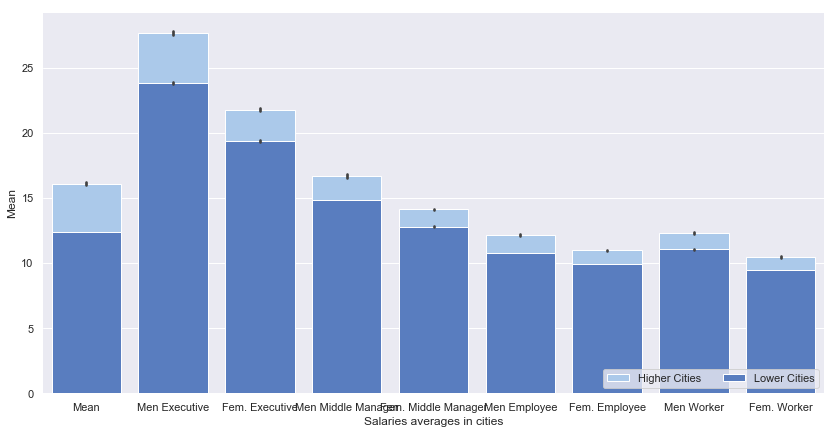

In [94]:
f, ax = plt.subplots(figsize=(14, 7))

sns.set_color_codes("pastel")
# sns.barplot(data=lower_mean_cities[['City', 'Mean','Fem. Executive','Fem. Middle Manager','Fem. Employee', 'Fem. Worker']].sort_values(by='Mean', ascending=False),
#             label="Top 10 Highest Cities", color="b")
sns.barplot(data=higher_mean_cities[['City', 'Mean', 'Men Executive','Fem. Executive', 'Men Middle Manager', 'Fem. Middle Manager','Men Employee', 'Fem. Employee','Men Worker',  'Fem. Worker']].sort_values(by='Mean', ascending=True),
            label="Higher Cities", color="b")

sns.set_color_codes("muted")
sns.barplot(data=lower_mean_cities[['City', 'Mean', 'Men Executive' ,'Fem. Executive','Men Middle Manager', 'Fem. Middle Manager','Men Employee', 'Fem. Employee','Men Worker',  'Fem. Worker']].sort_values(by='Mean', ascending=True),
            label="Lower Cities", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Mean",
       xlabel="Salaries averages in cities")
sns.despine(left=True, bottom=True)

<ul>
    <li>
        Only female executives earn more than country's average.
    </li>
    <li>
        Gap between women and men stereotype is real. In all categories we see differences between salaries
    </li>
</ul>

### Labor market

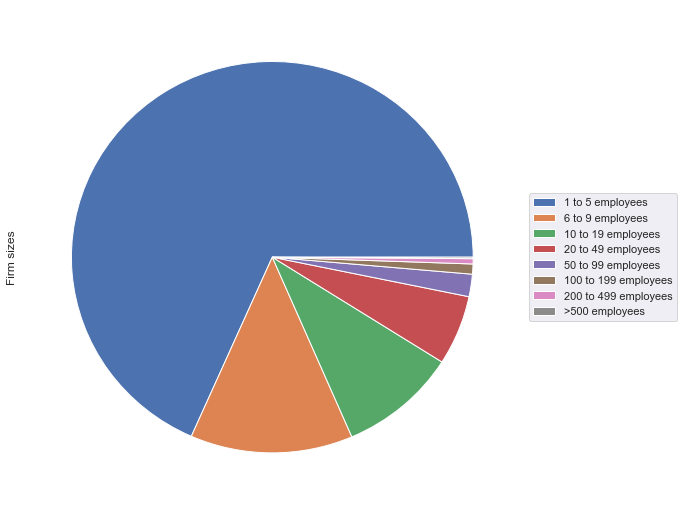

In [132]:
df_firm_size_distribution = pd.DataFrame({'Firm sizes': [full_data['1 to 5 employees'].sum(), full_data['6 to 9 employees'].sum(),full_data['10 to 19 employees'].sum(),full_data['20 to 49 employees'].sum(), full_data['50 to 99 employees'].sum(), full_data['100 to 199 employees'].sum(), full_data['200 to 499 employees'].sum(), full_data['>500 employees'].sum()]}, index = ['1 to 5 employees', '6 to 9 employees', '10 to 19 employees', '20 to 49 employees', '50 to 99 employees', '100 to 199 employees', '200 to 499 employees', '>500 employees'])
pie= df_firm_size_distribution.plot.pie(y='Firm sizes', figsize= [9,9], labels=None)
pie.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=df_firm_size_distribution.index)


<li>Almost 3/4 of all labor market is taken by small firms which consists of 1-5 employees. </li>

In [152]:
firms = {"Total firms":full_data['Total firms'].sum(), "Women earn more than average":full_data[full_data['Women']>hour_mean]['Total firms'].sum(), "Men earn more than average": full_data[full_data['Man']>hour_mean]['Total firms'].sum()}

In [159]:
firms

{'Men earn more than average': 2527484,
 'Total firms': 4528492,
 'Women earn more than average': 1023290}